#### Name :Mugdha Sawalapurkar
#### Roll No. : 21101A0004
#### Branch : BE CMPN-B

### ML Problem Statement 5 : XGBoost - Part 2  (Regression)

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("C:/Users/manji/Desktop/Sem 7/ML/Exp 5/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


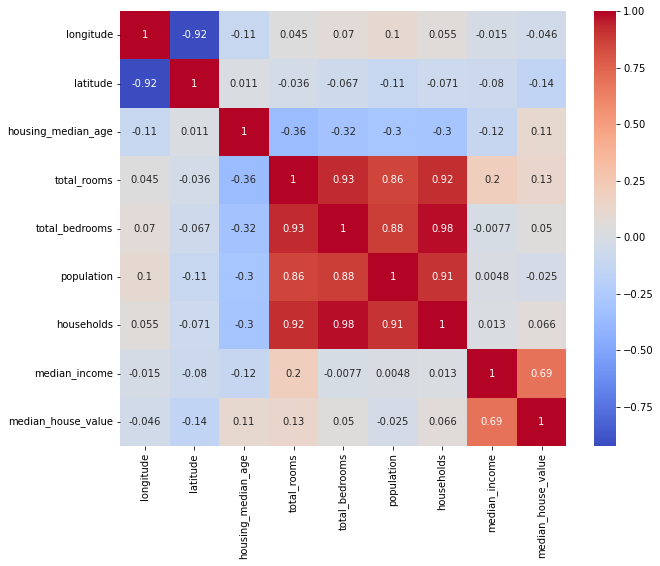

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop(columns='median_house_value')  # 'MedHouseVal' is the target variable
y = df['median_house_value']

# One-hot encode the 'ocean_proximity' categorical feature
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (16512, 12)
Testing set size: (4128, 12)


In [19]:
# Regression steps
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [20]:
# Create the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the regressor on the training set
xg_reg.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = xg_reg.predict(X_test)


In [21]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 2281072204.21
Mean Absolute Error: 32048.26
R² Score: 0.83


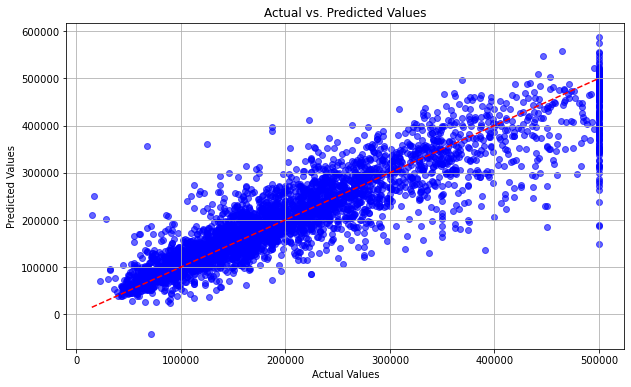

In [22]:
# Plotting actual vs predicted 

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


In [31]:
# Analysis of results
print("Analysis and Interpretation of XGBoost Model Performance")
print("---------------------------------------------------------")
print(f"1. Mean Squared Error (MSE): {mse:.2f}")
print(f"   - A lower MSE indicates better model performance. It shows the average squared difference between predicted and actual values.")

print(f"2. R² Score: {r2:.2f}")
print(f"   - An R² score closer to 1 indicates a strong relationship between the features and the target variable. If R² is significantly below 0, it implies the model is performing poorly.")

# Insights based on MSE and R²
print("INSIGTS : \n")
if r2 > 0.7:
    print("   - The model explains a significant portion of the variance, indicating a good fit.")
else:
    print("   - The model may need improvement in terms of feature engineering or hyperparameter tuning.")

if mse < 2500000000:  # Example threshold, adjust as needed based on your dataset
    print("   - The MSE is within an acceptable range, suggesting reasonable predictive accuracy.")
else:
    print("   - The MSE is relatively high, indicating that the model's predictions are not very close to the actual values.")


Analysis and Interpretation of XGBoost Model Performance
---------------------------------------------------------
1. Mean Squared Error (MSE): 2281072204.21
   - A lower MSE indicates better model performance. It shows the average squared difference between predicted and actual values.
2. R² Score: 0.83
   - An R² score closer to 1 indicates a strong relationship between the features and the target variable. If R² is significantly below 0, it implies the model is performing poorly.
INSIGTS : 

   - The model explains a significant portion of the variance, indicating a good fit.
   - The MSE is relatively high, indicating that the model's predictions are not very close to the actual values.
